**GLM - REGRESSÃO LINEAR - Sklearn e Statsmodels<br>**
<br>
Motivação<br>
•Removendo correlações<br>
•treinamento e tesde de regressão linear com Sklearn<br>
•entendendo os coeficientes da regressão<br>
•Visualização dos resultados<br>
•treinamento e teste da regressão linear com Statsmodels<br>
•Diagnóstico da regressão<br>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [46]:
import os
os.chdir("C:\\Users\\dalto\\OpM na Prática\\Python\\Base de Dados")

wine = pd.read_csv("winequality-red.csv", sep =";")
wine = wine.drop([1598])

wine.shape

(1598, 12)

In [47]:
wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [48]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000
mean,8.321089,0.527957,0.270851,2.538141,0.087479,15.873592,46.470588,0.996747,3.311064,0.658148,10.422622,5.635795
std,1.740673,0.179033,0.194798,1.410119,0.047077,10.463296,32.905432,0.001888,0.154422,0.169560,1.065903,0.807771
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997837,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Text(0.5, 1.0, 'Distribuição Qualidade do Vinho')

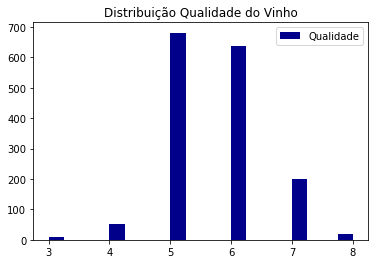

In [49]:
plt.hist(wine["quality"], bins = 20
        , histtype = "stepfilled"
        , color = "darkblue"
        , edgecolor = "none"
        , label = "Qualidade")

plt.legend()
plt.title("Distribuição Qualidade do Vinho")

5 premissas da Regressão Linear<br>
•Relação linear entre X e Y;<br>
•Ausência de correlação entre todos os X;<br>
•Os erros devem ter a variância constante (homocedasticidade);<br>
•Os erros não podem ser correlacionados<br>
•Seus alvos e seus erros devem ter uma distribuição normal<br>


In [50]:
# Analisando a correlação das variáveis com o nosso alvo

correl = wine.corr()['quality'].drop('quality')

correl

fixed acidity           0.124505
volatile acidity       -0.390420
citric acid             0.226172
residual sugar          0.013522
chlorides              -0.128800
free sulfur dioxide    -0.050717
total sulfur dioxide   -0.185075
density                -0.174767
pH                     -0.057884
sulphates               0.251410
alcohol                 0.476087
Name: quality, dtype: float64

<AxesSubplot:>

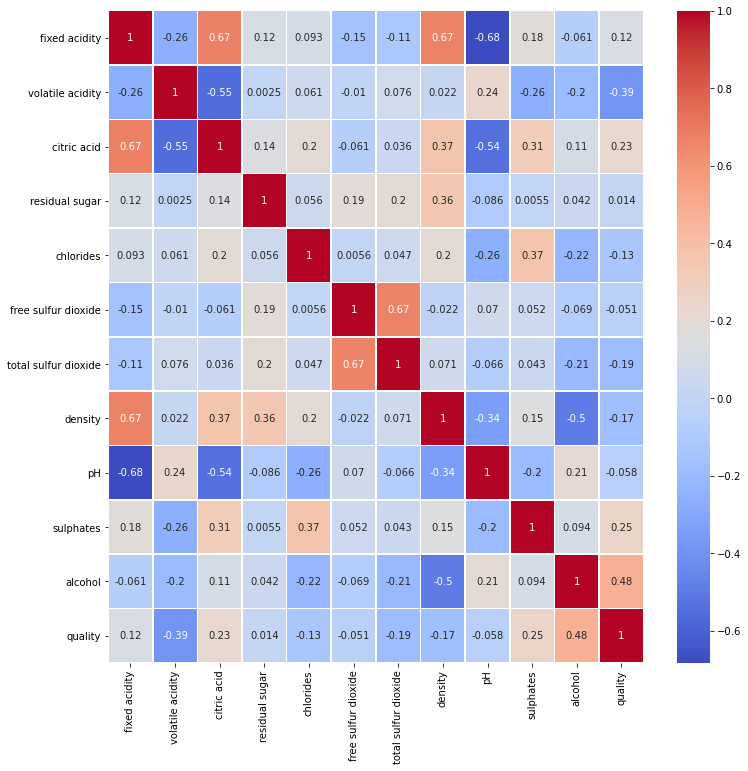

In [51]:
# Visualizando as correlações - Geralmente heat maps são o melhor tipo de visualização

correlX = wine.corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(correlX, cmap ="coolwarm", annot = True, linewidth=.6, ax=ax)

In [52]:
# Pega o módulo dos valores das correlações
correlT = wine.corr().abs()
# Como o heatmap é uma matriz triangular espelhada, usa-se essa linha para remover os valores repetidos
superior = correlT.where(np.triu(np.ones(correlT.shape), k=1).astype(bool))
# Remove todas as colunas que tem correlação superior a 0.5 entre si
var_remove = [variaveis for variaveis in superior.columns if any(superior[variaveis] > 0.5)]

wine = wine.drop(wine[var_remove], axis = 1)

In [53]:
wine.shape

(1598, 8)

In [54]:
#procurando outliers
wine.describe()
#Apenas possivelmente o free sulfur dioxide teria possibilidade de ter, mas nada muito crítico

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,sulphates,alcohol,quality
count,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000
mean,8.321089,0.527957,2.538141,0.087479,15.873592,0.658148,10.422622,5.635795
std,1.740673,0.179033,1.410119,0.047077,10.463296,0.169560,1.065903,0.807771
min,4.600000,0.120000,0.900000,0.012000,1.000000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,1.900000,0.070000,7.000000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,2.200000,0.079000,14.000000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,2.600000,0.090000,21.000000,0.730000,11.100000,6.000000
max,15.900000,1.580000,15.500000,0.611000,72.000000,2.000000,14.900000,8.000000


In [55]:
#TREINAMENTO E TESTE DA REGRESSÃO LINEAR COM SKLEARN
#Separando os dados com variáveis em x e o alvo em y

x = wine.drop('quality', axis = 1)
y = wine['quality']

In [56]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.50, random_state=0)


In [57]:
#treinando o modelo
lr = LinearRegression()

lr.fit(xTrain, yTrain) #essa é a linha que treina o modelo


LinearRegression()

In [58]:
# Predições para o treinamento e teste

predTrain = lr.predict(xTrain)
predTest = lr.predict(xTest)

In [61]:
len(yTrain)

799

In [64]:
# aAvaliação dos resultados
import sklearn.metrics as metrics
from math import sqrt

MAEtrain = metrics.mean_absolute_error(yTrain, predTrain)
R2train = metrics.r2_score(yTrain, predTrain)
RMSEtrain = sqrt(metrics.mean_squared_error(yTrain, predTrain))

print("----- Avaliação do treinamento -----")
print("MAE: ", round(MAEtrain, 2))
print("R2: ", round(R2train, 2))
print("RMSE: ", round(RMSEtrain, 2))


MAEtest = metrics.mean_absolute_error(yTest, predTest)
R2test = metrics.r2_score(yTest, predTest)
RMSEtest = sqrt(metrics.mean_squared_error(yTest, predTest))

print("----- Avaliação do treinamento -----")
print("MAE: ", round(MAEtest, 2))
print("R2: ", round(R2test, 2))
print("RMSE: ", round(RMSEtest, 2))

----- Avaliação do treinamento -----
MAE:  0.5
R2:  -0.4
RMSE:  0.65
----- Avaliação do treinamento -----
MAE:  0.52
R2:  0.32
RMSE:  0.66


In [66]:
# Olhando apenas para a base de teste

print("A qualidade média de vinho da base e: ")
print(round(yTest.mean(),2))
print()
print("O percentual do MAE em relação à média da base: ")
print(round(metrics.mean_absolute_error(yTest, predTest)/yTest.mean()*100,2),"%") #10% é aceitável 

A qualidade média de vinho da base e: 
5.64

O percentual do MAE em relação à média da base: 
9.25 %


In [69]:
# métido .coef- pega os coeficientes da regressão linear, excluindo o intercept
coef = pd.DataFrame(lr.coef_,wine.columns[0:7]) # essa linha relaciona os coeficientes às colunas correspondentes 
coef.columns = ['Coeficientes']

print(coef)

                     Coeficientes
fixed acidity            0.024036
volatile acidity        -1.192384
residual sugar           0.005209
chlorides               -1.852780
free sulfur dioxide     -0.004043
sulphates                0.857900
alcohol                  0.293289


In [70]:
lr.intercept_

2.680021835665592

In [71]:
wine.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,sulphates,alcohol,quality
0,7.4,0.70,1.9,0.076,11.0,0.56,9.4,5
1,7.8,0.88,2.6,0.098,25.0,0.68,9.8,5
2,7.8,0.76,2.3,0.092,15.0,0.65,9.8,5
3,11.2,0.28,1.9,0.075,17.0,0.58,9.8,6
4,7.4,0.70,1.9,0.076,11.0,0.56,9.4,5


In [77]:
# Fazendo a predição em um predict

lr.predict([[ 7.4, 0.31, 2.2, 0.036, 14.0, 0.95, 11.4]])

array([6.53491297])

In [78]:
resultados = pd.DataFrame({'Real': yTest, 'Previsto': predTest})
resultados

,Real,Previsto
913,7,6.399825
1031,7,5.724120
1000,7,6.210412
487,6,5.340276
977,5,4.962565
...,...,...
1550,5,5.062853
566,6,4.782889
1346,5,5.834026
980,6,5.848328


Text(0.5, 1.0, 'Regressão Linear - Qualidade do Vinho')

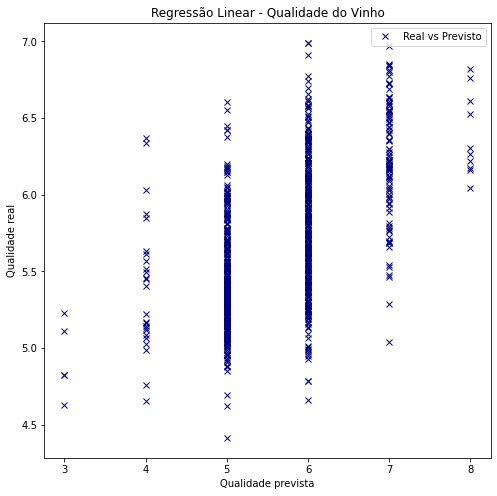

In [81]:
# Gráfico de resultados

plt.figure(figsize = (8,8))
plt.plot(yTest, predTest, "x", color = "navy", label = "Real vs Previsto")
plt.legend()
plt.xlabel("Qualidade prevista")
plt.ylabel("Qualidade real")
plt.title("Regressão Linear - Qualidade do Vinho")
# Espera-se uma línha diagonal

In [90]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# OLS = Ordinary Least Square

In [84]:
# Treinando o modelo com statsmodels
# Por padrão o statsmodels não acrescenta o intercept
# você deve acrescentá-lo manualmente

xTrain2 = sm.add_constant(xTrain)
xTest2 = sm.add_constant(xTest)

lrSM = sm.OLS(yTrain, xTrain2).fit() #Treino do modelo propriamente dito

predTrainSM = lrSM.predict(xTrain2)
predTestSM = lrSM.predict(xTest2)

#imprimir as estatísticas
lrSM.summary()

# o teste de Jarque-Bera quantifica a homocedasticidade do modelo, quanto mais próximo de zero melhor

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     67.42
Date:                Wed, 11 Aug 2021   Prob (F-statistic):           3.46e-76
Time:                        21:07:02   Log-Likelihood:                -783.78
No. Observations:                 799   AIC:                             1584.
Df Residuals:                     791   BIC:                             1621.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.6800      0.325      8.237      0.000       2.041       3.319
fixed acidity           0.0240      0.015      1.640      0.101      -0.005       0.053
volatile acidity       -1.1924      0.131     -9.123      0.000      -1.449      -0.936
residual sugar          0.0052      0.014      0.364      0.716      -0.023       0.033
chlorides              -1.8528      0.514     -3.607      0.000      -2.861      -0.844
free sulfur dioxide    -0.0040      0.002     -1.845      0.065      -0.008       0.000
sulphates               0.8579      0.151      5.690      0.000       0.562       1.154
alcohol                 0.2933      0.024     12.426      0.000       0.247       0.340
==============================================================================
Omnibus:                       22.249   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.109
Skew:                          -0.273   Prob(JB):                     1.76e-07
Kurtosis:                       3.798   Cond. No.                         530.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
# aAvaliação dos resultados com statsmodels

#import statsmodels.api

MAEtrainSM = statsmodels.tools.eval_measures.meanabs(yTrain, predTrain)
R2trainSM = lrSM.rsquared
RMSEtrainSM = statsmodels.tools.eval_measures.rmse(yTrain, predTrain)

print("----- Avaliação do treinamento -----")
print("MAE: ", round(MAEtrainSM, 2))
print("R2: ", round(R2trainSM, 2))
print("RMSE: ", round(RMSEtrainSM, 2))


MAEtestSM = statsmodels.tools.eval_measures.meanabs(yTest, predTest)
RMSEtestSM = statsmodels.tools.eval_measures.rmse(yTest, predTest)

print("----- Avaliação do treinamento -----")
print("MAE: ", round(MAEtestSM, 2))
print("RMSE: ", round(RMSEtestSM, 2))

----- Avaliação do treinamento -----
MAE:  0.5
R2:  0.37
RMSE:  0.65
----- Avaliação do treinamento -----
MAE:  0.52
RMSE:  0.66


In [92]:
# Mostrando os pesos da regressão com SM

print(lrSM.params)

const                  2.680022
fixed acidity          0.024036
volatile acidity      -1.192384
residual sugar         0.005209
chlorides             -1.852780
free sulfur dioxide   -0.004043
sulphates              0.857900
alcohol                0.293289
dtype: float64


In [93]:
#DIAGNÓSTICO DA REGRESSÃO

lrSM.resid

523    -0.357278
626    -0.075084
495     1.832676
1532    0.461760
155    -0.810503
          ...   
763    -0.110777
835    -0.011255
1216    0.607933
559    -0.580870
684     0.358284
Length: 799, dtype: float64

Text(0.5, 1.0, 'Residuals x Fitted Values - Qualidade do Vinho')

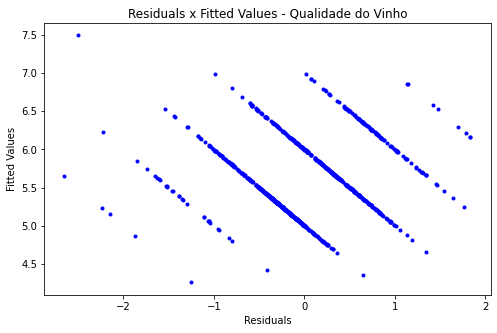

In [94]:
# Residuals x Fitted Values

plt.figure(figsize = (8,5))
plt.plot(lrSM.resid, predTrainSM, ".", color = "b")
plt.xlabel("Residuals")
plt.ylabel("Fitted Values")
plt.title("Residuals x Fitted Values - Qualidade do Vinho")

# Pelo resultado, aparentemente o modelo de regressão linear não é o indicado para essa base de dados
# talvez um de classificação, como uma árvore de decisão

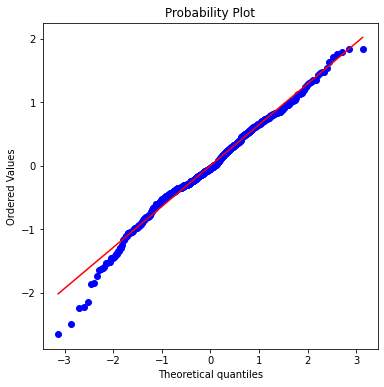

In [96]:
# Normality plot

import scipy as sp

fig, ax = plt.subplots(figsize=(6,6))

sp.stats.probplot(lrSM.resid, plot = ax, fit = True);

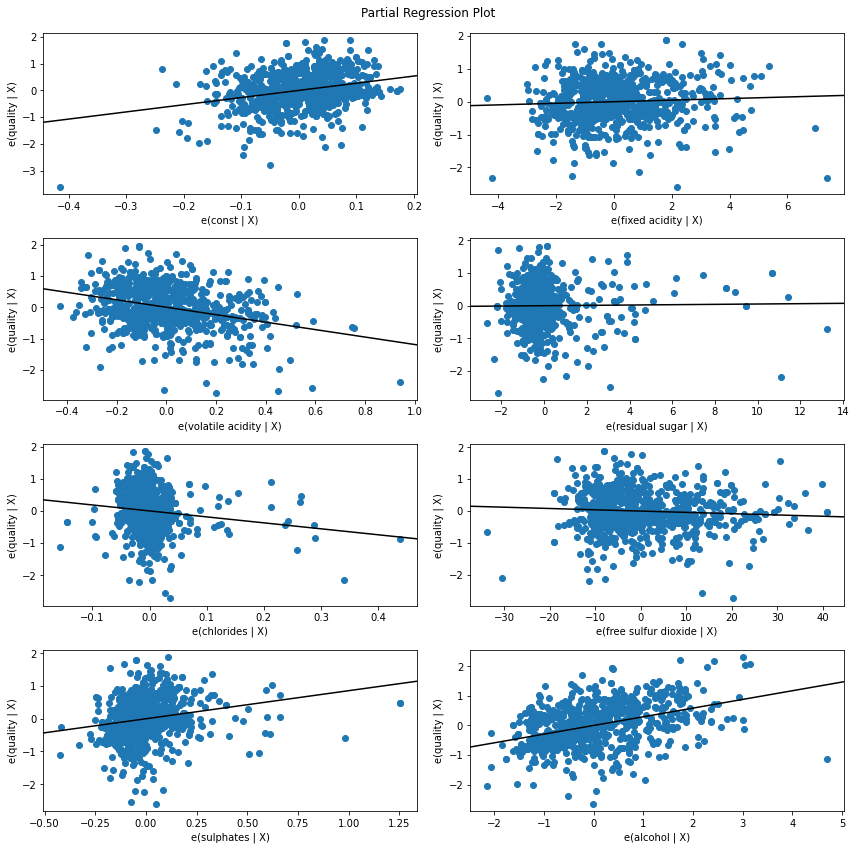

In [98]:
 import statsmodels.api as sm
    
fig = plt.figure(figsize=(12,12))
fig = sm.graphics.plot_partregress_grid(lrSM, fig = fig)

# Parcial plots - faz um plot linear da variável alvo contra cada das variáveis do modelo

In [113]:
#wine2 = wine[["volatile acidity", "chlorides", "sulphates", "alcohol", "quality"]]
wine2 = wine[["volatile acidity", "alcohol", "quality"]]

x3 = wine2.drop('quality', axis = 1)
y3 = wine2['quality']

xTrain3, xTest3, yTrain3, yTest3 = train_test_split(x3, y3, test_size = 0.50)

xTrain3 = sm.add_constant(xTrain3)
xTest3 = sm.add_constant(xTest3)

lrSM2 = sm.OLS(yTrain3, xTrain3).fit()

predTrainSM2 = lrSM2.predict(xTrain3)
predTestSM2 = lrSM2.predict(xTest3)

lrSM2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     196.2
Date:                Wed, 11 Aug 2021   Prob (F-statistic):           5.35e-70
Time:                        21:51:07   Log-Likelihood:                -791.46
No. Observations:                 799   AIC:                             1589.
Df Residuals:                     796   BIC:                             1603.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.1132      0.265     11.744      0.000       2.593       3.634
volatile acidity    -1.3837      0.138    -10.017      0.000      -1.655      -1.113
alcohol              0.3145      0.023     13.888      0.000       0.270       0.359
==============================================================================
Omnibus:                       11.956   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               18.372
Skew:                          -0.095   Prob(JB):                     0.000102
Kurtosis:                       3.718   Cond. No.                         126.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Residuals x Fitted Values - Qualidade do Vinho')

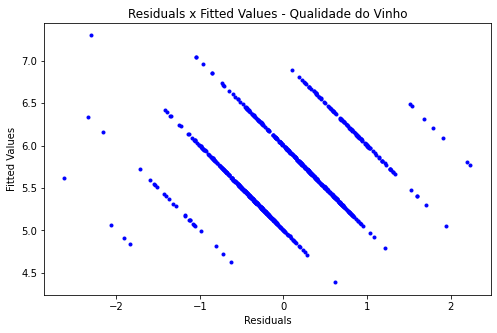

In [114]:
# Residuals x Fitted Values

plt.figure(figsize = (8,5))
plt.plot(lrSM2.resid, predTrainSM2, ".", color = "b")
plt.xlabel("Residuals")
plt.ylabel("Fitted Values")
plt.title("Residuals x Fitted Values - Qualidade do Vinho")

# Pelo resultado, aparentemente o modelo de regressão linear não é o indicado para essa base de dados
# talvez um de classificação, como uma árvore de decisão

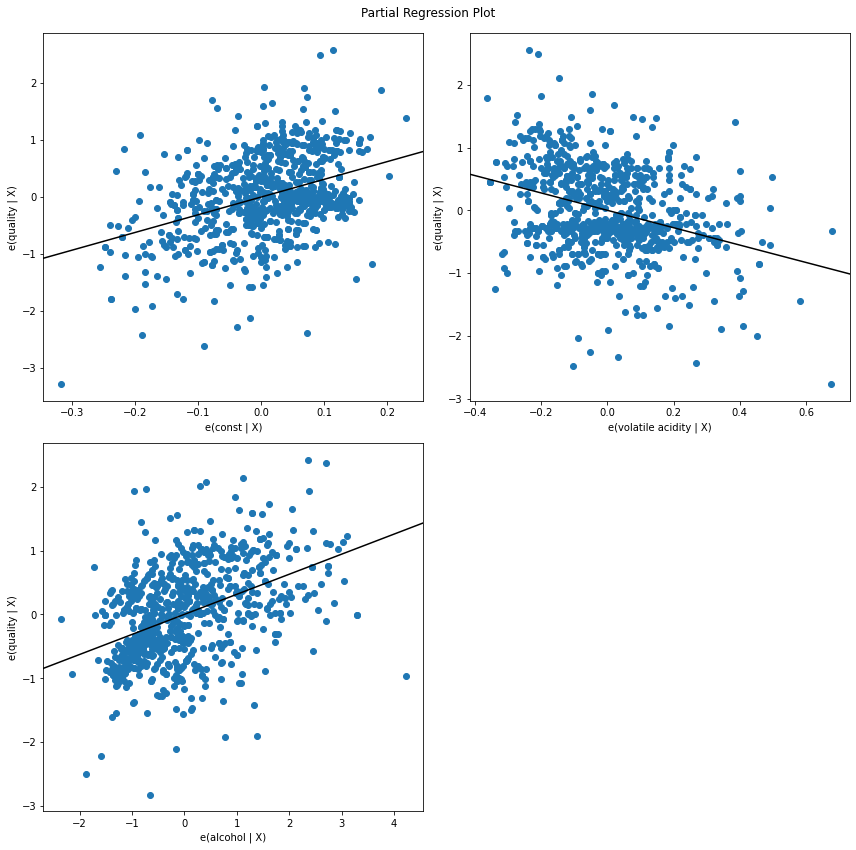

In [115]:
import statsmodels.api as sm
    
fig = plt.figure(figsize=(12,12))
fig = sm.graphics.plot_partregress_grid(lrSM2, fig = fig)

# Parcial plots - faz um plot linear da variável alvo contra cada das variáveis do modelo